## Modelos basados en árbol / Predicción de Precios de Vehículos Usados (Core) - Elida Peña

In [18]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# Carga de las informaciondes de Automovile_data
path = '../data/used_cars.csv'
df = pd.read_csv(path, sep=',', header=0)
# Visualizar las primeras filas del conjunto de datos
print(df.head())

# Verificar información general
print(df.info())

# Describir las características numéricas
print(df.describe())

      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic        

In [10]:
print(df.columns)  # Verifica los nombres de las columnas en tu DataFrame

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')


In [11]:
# Convertir 'price' a tipo numérico si es necesario
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])  # Eliminar filas con valores NaN en 'price' después de la conversión


In [16]:
X = df.drop('price', axis=1)  # Elimina 'price' para crear X
y = df['price']          
# Convertir 'price' a tipo numérico, manejando valores no convertibles
y = pd.to_numeric(y, errors='coerce')
df = df.dropna(subset=['price'])  # Eliminar filas con valores NaN en 'price'


In [5]:
# Manejar valores faltantes (rellenar o eliminar según sea necesario)
df = df.dropna()  # Eliminar filas con valores faltantes (puedes ajustar según el caso)

# Eliminar duplicados
df = df.drop_duplicates()

# Escalado y codificación de características
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Dividir datos en conjuntos de entrenamiento y prueba
X = df.drop('price', axis=1)  # Reemplaza 'price' con tu variable objetivo
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


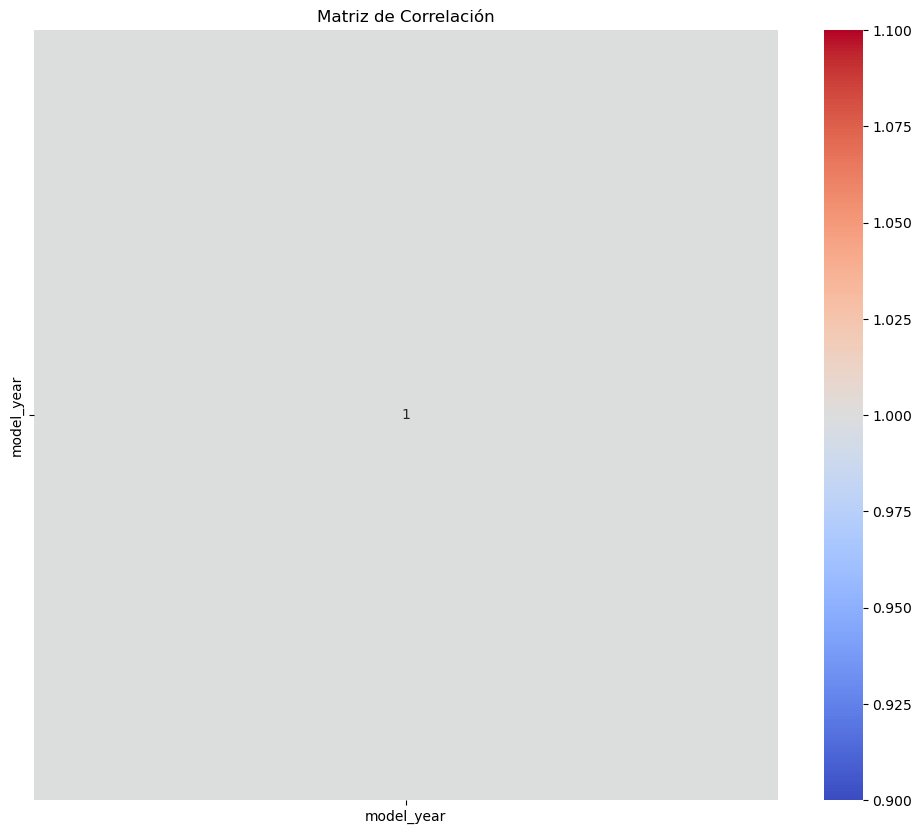

In [9]:
# Visualización univariada
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



In [17]:
# Crear y evaluar modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}')


ValueError: A given column is not a column of the dataframe

In [19]:
num_features = ['milage', 'model_year', 'engine']  # Reemplaza con tus columnas numéricas
cat_features = ['brand', 'model', 'fuel_type', 'transmission', 'accident', 'clean_title']  # Reemplaza con tus columnas categóricas

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ]
)

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['column1', 'column2']),  # Reemplaza con tus columnas numéricas
        ('cat', OneHotEncoder(), ['column3'])  # Reemplaza con tus columnas categóricas
    ]
)

# Definir el Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Definir la búsqueda de hiperparámetros
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'column1'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_indexing.py", line 361, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\pandas\core\indexes\base.py", line 3812, in get_loc
    raise KeyError(key) from err
KeyError: 'column1'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\compose\_column_transformer.py", line 968, in fit_transform
    self._validate_column_callables(X)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\compose\_column_transformer.py", line 536, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "c:\Users\59598\miniconda3\envs\mitic_dojo\lib\site-packages\sklearn\utils\_indexing.py", line 369, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe
